In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import os

from tqdm.autonotebook import tqdm
tqdm.pandas()

%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import json

/var/folders/73/1_fd1jr14477j2fv2b70mpx00000gn/T/ipykernel_25642/684597363.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
from kst.data_sets.TextDocument import TextDocument
from kst.data_sets.TextCorpus import TextCorpus

In [4]:
from gensim.parsing.preprocessing import (
    strip_tags,
    strip_punctuation,
    strip_multiple_whitespaces,
    remove_stopwords,
    strip_short,
    strip_numeric,
    stem_text
)

In [5]:
GENSIM_CUSTOM_TEKENIZER = [
            lambda x: x.lower(),
            strip_tags,
            strip_punctuation,
            strip_multiple_whitespaces,
            remove_stopwords,
            strip_numeric,
            lambda x: strip_short(x, minsize=2),
        ]

# Training data

In [6]:
tc = TextCorpus(corpus_description='txt sentoken train corpus', gensim_custom_tokenizer=GENSIM_CUSTOM_TEKENIZER)

In [7]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/txt_sentoken/neg"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc.add_document(TextDocument(os.path.join(docs_path,file), 0))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:01<00:00, 923.99it/s]


In [8]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/txt_sentoken/pos"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc.add_document(TextDocument(os.path.join(docs_path,file), 1))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 809.55it/s]


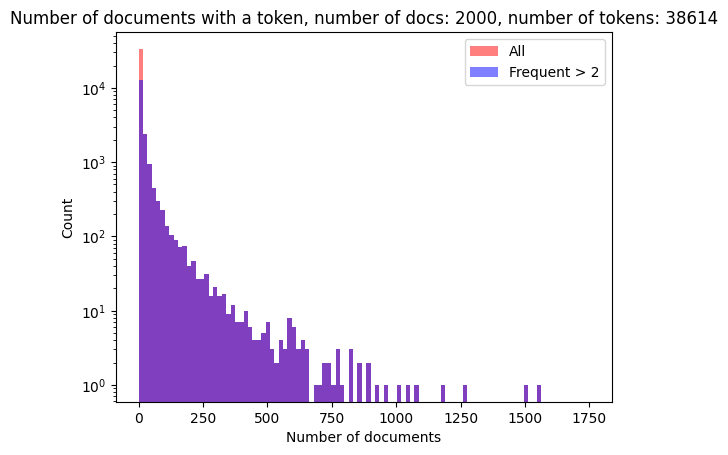

In [9]:
min_docks = 2
bin_size = int(max(list(tc.token_doc_count.values()))/100)
my_bins = range(0,max(list(tc.token_doc_count.values())),bin_size)
plt.hist([i for i in list(tc.token_doc_count.values()) if (i > 0)], bins = my_bins, color = 'red', alpha = 0.5, label = 'All')
plt.hist([i for i in list(tc.token_doc_count.values()) if (i > min_docks)], bins = my_bins, color = 'blue', alpha = 0.5, label = f'Frequent > {min_docks}')
plt.yscale("log")
plt.title(f"""Number of documents with a token, number of docs: {tc.docs_count}, number of tokens: {tc.tokens_count}""")
plt.xlabel("Number of documents")
plt.ylabel("Count")
plt.legend(loc="upper right")

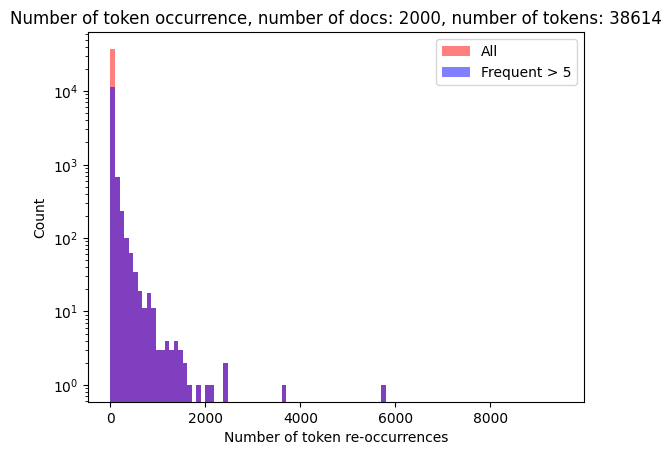

In [10]:
min_count = 5
bin_size = int(max(list(tc.token_absolute_count.values()))/100)
my_bins = range(0,max(list(tc.token_absolute_count.values())),bin_size)
plt.hist([i for i in list(tc.token_absolute_count.values()) if (i > 0)], bins = my_bins, color = 'red', alpha = 0.5, label = 'All')
plt.hist([i for i in list(tc.token_absolute_count.values()) if (i > min_count)], bins = my_bins, color = 'blue', alpha = 0.5, label = f'Frequent > {min_count}')
plt.yscale("log")
plt.title(f"""Number of token occurrence, number of docs: {tc.docs_count}, number of tokens: {tc.tokens_count}""")
plt.xlabel("Number of token re-occurrences")
plt.ylabel("Count")
plt.legend(loc="upper right")

In [11]:
tc.tokens_count

38614

In [12]:
len(tc.get_frequent_tokens(min_count,min_docks))

14030

In [13]:
len(tc.get_rare_tokens(min_count,min_docks))

20225

In [14]:
len(tc.get_frequent_tokens(min_count,min_docks))+len(tc.get_rare_tokens(min_count,min_docks))

34255

In [15]:
tc.get_rare_tokens(min_count,min_docks)[:10]

['anatomical',
 'macnamara',
 'foothold',
 'hooters',
 'knockers',
 'helpings',
 'emanating',
 'gurian',
 'goofiest',
 'lesbo']

In [16]:
tc.get_frequent_tokens(800, 1000)

['movie', 'film', 'way', 'like', 'good', 'time', 'character', 'story']

In [17]:
too_rare = tc.get_rare_tokens(min_count,min_docks)
too_frequent = tc.get_frequent_tokens(800, 1000)

tokens_to_exclude =  too_rare + too_frequent

In [18]:
corpus, token2index, index2token = tc.get_corpus(tokens_to_exclude)

Getting corpus: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 8010.99it/s]


In [19]:
labels = tc.labels

In [20]:
corpus_df = pd.DataFrame.from_dict({'corpus':corpus, 'labels':labels})

In [21]:
corpus_df['token_indexes'] = corpus_df.corpus.map(lambda x: [token2index.get(i) for i in x if i in token2index.keys()])
corpus_df['n_tokens'] = corpus_df.token_indexes.map(lambda x: len(x))

In [22]:
corpus_df

,corpus,labels,token_indexes,n_tokens
0,"[bad, bad, bad, word, pretty, sums, valley, do...",0,"[1116, 1116, 1116, 18176, 12499, 15929, 17463,...",409
1,"[isn, ultimate, sign, cinematic, ineptitude, t...",0,"[8623, 17053, 14744, 2748, 8228, 16482, 15881,...",229
2,"[gordy, minute, long, sesame, street, skit, ba...",0,"[6935, 10391, 9605, 14464, 15708, 14889, 1116,...",186
3,"[phone, line, accept, charges, avoid, wretched...",0,"[11984, 9488, 63, 2553, 1041, 18241, 10201, 73...",272
4,"[robert, forster, famous, appearing, jackie, b...",0,"[13790, 6385, 5860, 677, 8652, 2003, 8025, 147...",140
...,...,...,...,...
1995,"[funniest, carry, movies, medical, setting, ma...",1,"[6564, 2353, 10665, 10172, 14474, 9826, 4817, ...",196
1996,"[remember, making, pact, right, patch, adams, ...",1,"[13366, 9845, 11583, 13716, 11740, 156, 5043, ...",314
1997,"[barely, playing, nyc, piano, bar, timothy, hu...",1,"[1203, 12140, 11138, 12005, 1190, 16594, 7900,...",155
1998,"[current, trends, hollywood, filmmaking, conti...",1,"[3809, 16871, 7670, 6080, 3395, 12555, 18299, ...",333


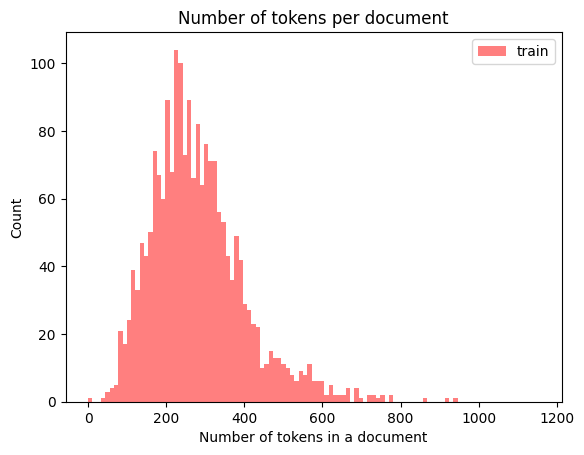

In [23]:
bin_size = int(max(list(corpus_df.n_tokens.values))/100)
my_bins = range(0,max(list(corpus_df.n_tokens.values)),bin_size)
plt.hist(corpus_df.n_tokens, bins = my_bins, color = 'red', alpha = 0.5, label='train')
# plt.hist(corpus_test_df.n_tokens, bins = my_bins, color = 'blue', alpha = 0.5, label='test')
# plt.yscale("log")
plt.title(f"""Number of tokens per document""")
plt.xlabel("Number of tokens in a document")
plt.ylabel("Count")
plt.legend(loc="upper right")

# Store tokens

In [24]:
corpus_df.sample(frac = 1.0).to_pickle('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/txt_sentoken/corpus_train_df.pkl')

In [25]:
with open("/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/txt_sentoken/token2index.json", "w") as outfile:
    outfile.write(json.dumps(token2index))

In [26]:
with open("/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/txt_sentoken/index2token.json", "w") as outfile:
    outfile.write(json.dumps(index2token))